!!! ссылки не работают в техе

In [149]:
 from sympy import symbols, diff
import math
import numpy as np
from sympy import *
from IPython.display import display
from numpy.linalg import inv
import numpy.linalg
import matplotlib.pyplot as plt



$C_{2}H_{2}+2.5O_2+9.405N_2 => 2CO_2 + H_2O + 9.405N_2$


Введем нумерацию компонентов: 
$C_2H_2$ - 1, $O_2$ - 2, $N_2$ - 3, $CO_2$ - 4, $H_2O$ - 5.
Массовые доли компонент в продуктах детонации $\omega_1$ = 0,  $\omega_2$ = 0,  $\omega_3$ = 0.713,  $\omega_4$ = 0.238, $\omega_5$ = 0.048

Молярные массы компонент в граммах на моль $\mu_1$ = 14, $\mu_2$ = 32, $\mu_3$ = 28, $\mu_4$ = 44, $\mu_5$ = 18.

Массовые доли компонент перед фронтом волны $\omega_{10}$ = 0.039, $\omega_{20}$ = 0.223, $\omega_{30}$ = 0.736, $\omega_{40}$ = 0, $\omega_{50}$ = 0, 

Найдем $\eta_0$ из третьего уравнения системы:

Подсчет $\eta_0$:

In [150]:
a_1 = [1.6*10**5,  -2.21*10**3, 1.26*10**1, -7.98*10**(-3), 8.05*10**(-6), -2.43*10**(-9), -7.5*10**(-14)]
a_2 = [-3.425*10**4, 4.847*10**2, 1.119, 4.29388*10**(-3), -6.836*10**(-7), -2.023*10**(-9), 1.039*10**(-12)]
a_3 = [2.210*10**4, -3.818*10**2, 6.082, -8.53*10**(-3), 1.384*10**(-5), -9.6257*10**(-9), 2.5197*10**(-12)]
a_4 = [4.94*10**4, -6.264*10**2, 5.301, 2.505*10**(-3), -2.124*10**(-7), -7.692*10**(-10), 2.8499*10**(-13)]
a_5 = [-3.947*10**4, 5.755*10**2, 9.317*10**(-1), 7.222*10**(-3), -7.342*10**(-6), 4.955*10**(-9), -1.336*10**(-12)]
a = [a_1, a_2, a_3, a_4, a_5]

b_1 = [1.713*10**6, -5.928*10**3, 1.236*10, 1.314*10**(-4), -1.362*10**(-7), 2.712*10**(-11), -1.3*10**(-15)]
b_2 = [-1.03*10**6, 2.344*10**3, 1.819, 1.267*10**(-3), -2.188*10**(-7), 2.053*10**(-11), -8.193*10**(-16)]
b_3 = [5.8771*10**5, -2.239*10**3, 6.066, -6.139*10**(-4), 1.49*10**(-7), -1.923*10**(-11), 1.06*10**(-15)]
b_4 = [1.17*10**5, -1.788*10**3, 8.291, -9.224*10**(-5), 4.869*10**(-9), -1.892*10**(-12), 6.33*10**(-16)]
b_5 = [1.03*10**6, -2.412*10**3, 4.646, 2.291*10**(-3), -6.836*10**(-7), 9.4264*10**(-11), -4.8223*10**(-15)]
b = [b_1, b_2, b_3, b_4, b_5]

mu = [14, 32, 28, 44, 14] 
product_mass = 2*mu[3] + mu[4]+ 9.405*mu[3]
before_mass = mu[0] + 2.5 * mu[1] + 9.405* mu[2]
omega = [0, 0, (9.405*mu[2])/product_mass,(2* mu[3])/product_mass, mu[4]/product_mass]
omega_0 = [mu[0]/before_mass, 2.5*mu[1]/before_mass, 9.405*mu[2]/before_mass, 0, 0] 

In [151]:

R = 8.31*10**3   
p_0 = 10**5
T_0 = 298
Q = 3.38e6
fraction_0 = []
for i in range(len(omega)):
    fraction_0.append(omega[i]/mu[i])
eta_0 = (sum(fraction_0)*R* T_0)/p_0
print(eta_0)

0.5955467779457951


In [152]:
"""
из примера
"""
# mu_1 = 16
# mu_2 = 32 
# mu_3 = 28 
# mu_4 = 44 
# mu_5 = 18

"""
из примера
"""
# omega_10 = 0.055
# omega_20 = 0.220
# omega_30 = 0.725 
# omega_40 = 0
# omega_50 = 0

'\nиз примера\n'

In [153]:
'''
Функция считает теплоемкость для каждого компонента
коэффициенты a, b определяются компонентом и берутся из таблицы 
R = 8.31
''' 
def teploem(T, a, b):
    C = 0
    if T<=10**3:
        C = (sum([a[i] * T ** (i - 2) for i in range(7)]) -1)*R
#         C = (a[0]/T**2 + a[1]/T + a[2] + a[3]*T + a[4]*T**2 + a[5]*T**3 + a[6]*T**4 - 1)*R 
    else:
        C = (sum([b[i] * T ** (i - 2) for i in range(7)]) -1)*R
#         С = (b[0]/T**2 + b[1]/T + b[2] + b[3]*T + b[4]*T**2 + b[5]*T**3 + b[6]*T**4 - 1)*R 
    return C

In [154]:
"""
Теплоемкость при температуре T_0 = 298 К 
"""
C_0 = []
for i in range(5):
    C_0.append(teploem(T_0, a[i], b[i]))   

In [155]:
"""
Функция считает гамму
"""
def gamma(T, C):
    frac_0 = []
    frac = []
    for i in range(len(mu)):
        frac_0.append(omega[i]/mu[i])
        frac.append(C[i]*omega[i]/mu[i])
    gamma = 1 + R*(sum(frac_0))/(sum(frac))
    return gamma

$\gamma_0:$

In [156]:
gamma_0 = gamma(T_0, C_0)

In [157]:
"""
функция f_i, i от 5 до 9
"""
def f_i(C, T, a, b):
    if T<=10**3:
        res = (sum([a[i] * T ** (i - 2) for i in range(7)]) - C / R - 1)
    else:
        res = (sum([b[i] * T ** (i - 2) for i in range(7)]) - C / R - 1)
    return res

In [158]:
"""
частная производная по C f_i, i от 5 до 9
"""
part_C = 1/R

In [159]:
"""
частная производная по T f_i, i от 5 до 9, j от 5 до 9
"""
def part_i_T(T, a, b):
    if T <= 1e3:
        part_T = (sum([(i-2)*a[i] * T ** (i - 3) for i in range(7)])) 
    else:
        part_T = (sum([(i-2)*b[i] * T ** (i - 3) for i in range(7)]))
    return part_T

In [190]:
p, eta, T, gamma, C_1, C_2, C_3, C_4, C_5 = symbols('p eta T gamma C_1, C_2, C_3, C_4, C_5', real=True)
f_1 = p*eta/(gamma-1) - p_0*eta_0/(gamma_0 - 1) - 1/2*(p+p_0)*(eta_0 - eta) - Q 
# f_1 = p*eta - p_0*eta_0/(gamma_0 - 1) * (gamma-1) - 1/2*(p+p_0)*(eta_0 - eta)* (gamma-1) - Q * (gamma-1) 
f_2 = (p-p_0)/(eta_0 - eta) - (gamma*p)/eta
# f_2 = (p-p_0)*eta - p*(eta_0  - eta) * gamma

sum_3 = 0
for i in range(5):
    sum_3 += omega[i]/mu[i] 
f_3 = p*eta - sum_3*R*T
f_4 = gamma - 1 - R*sum_3/(C_1*omega[0]/mu[0] + C_2*omega[1]/mu[1] + C_3*omega[2]/mu[2] + 
                           C_4*omega[3]/mu[3] + C_5*omega[4]/mu[4])
diff(f_4, C_3)

3.64384787900116/(0.0182331045713621*C_3 + 0.00387732154627583*C_4 + 0.00193866077313792*C_5)**2

In [161]:
# print(diff(f_4, p), '\n',
# diff(f_4, eta), '\n',
# diff(f_4, T), '\n',
# diff(f_4, gamma), '\n',
# diff(f_4, C_1), '\n',
# diff(f_4, C_2), '\n',
# diff(f_4, C_3), '\n',
# diff(f_4, C_4), '\n',
# diff(f_4, C_5))

In [162]:
"""
строки 5-9 якобиана (i = от 5 до 9)
"""
def J_row_i(i, T):
    row_i = [0, 0, part_i_T(T, a[i-5], b[i-5]), 0, 0, 0, 0, 0, 0]
    row_i[i-1] = -1/R
    return row_i




In [163]:
"""
строка якобиана для функции f, значения val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9 подаются для переменных p, eta, T, gamma, C_1, C_2, C_3, C_4, C_5
"""
def J_row(f, val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9):
    
    symb = (p, eta, T, gamma, C_1, C_2, C_3, C_4, C_5)
    row = [lambdify(symb, diff(f, p), 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9), 
           lambdify(symb, diff(f, eta), 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9),
           lambdify(symb, diff(f, T), 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9), 
           lambdify(symb, diff(f, gamma), 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9), 
           lambdify(symb, diff(f, C_1), 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9), 
           lambdify(symb, diff(f, C_2), 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9),
           lambdify(symb, diff(f, C_3), 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9), 
           lambdify(symb, diff(f, C_4), 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9),
           lambdify(symb, diff(f, C_5), 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9)]
    return row

In [164]:
J_row(f_1, p_0, eta_0, T_0, gamma_0, C_0[0], C_0[1], C_0[2], C_0[3], C_0[4])

[1.6082479668477294, 370045.61629818904, 0, -434300.3133677047, 0, 0, 0, 0, 0]

In [165]:
def jacobian(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9):
    matr = [J_row(f_1, val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9), 
            J_row(f_2, val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9),
            J_row(f_3, val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9),
            J_row(f_4, val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9), 
            J_row_i(5, val_3), 
            J_row_i(6, val_3), 
            J_row_i(7, val_3), 
            J_row_i(8, val_3), 
            J_row_i(9, val_3)] 
             
    return matr

In [166]:
# jacobian(p_0, eta_0, T_0, gamma_0, C_0[0], C_0[1], C_0[2], C_0[3], C_0[4]) 

In [167]:
def FF(i, T, C):
    return f_i(C, T, a[i-5], b[i-5])


In [168]:
def Fcalc(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9):
    
    symb = (p, eta, T, gamma, C_1, C_2, C_3, C_4, C_5)
    row = [
        lambdify(symb, f_1, 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9),
        lambdify(symb, f_2, 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9),
        lambdify(symb, f_3, 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9),
        lambdify(symb, f_4, 'math')(val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_9),
        FF(5, val_3, val_5),
        FF(6, val_3, val_6),
        FF(7, val_3, val_7),
        FF(8, val_3, val_8),
        FF(9, val_3, val_9)
    ]
    return row
def Fcalc2(x_vec):
    return Fcalc(x_vec[0], x_vec[1], x_vec[2], x_vec[3], x_vec[4], x_vec[5], x_vec[6], x_vec[7], x_vec[8])


In [169]:
Fcalc(p_0, eta_0, T_0, gamma_0, C_0[0], C_0[1], C_0[2], C_0[3], C_0[4])


[-3379999.9999999967,
 -230092.3886902232,
 1.0186340659856796e-10,
 2.5579538487363607e-13,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [243]:
def newton(p, eta, T, gamma, C_1, C_2, C_3, C_4, C_5):
    x_vec = np.array((p, eta, T, gamma, C_1, C_2, C_3, C_4, C_5), dtype='float')
    x_0 = 1e10
    i= 0
    vals = []
    while abs(x_0)/p_0 >= 1e-3:
        tmp = jacobian(x_vec[0], x_vec[1], x_vec[2], x_vec[3], x_vec[4], x_vec[5], x_vec[6], x_vec[7], x_vec[8])
        dx_vec  = np.linalg.inv(tmp) @ Fcalc2(x_vec) ### have to F
        x_0 = dx_vec[0]
        vals.append(list(x_vec))
#         print(vals, x_vec)
        x_vec -= dx_vec
        i+=1
    return i, x_vec, vals

In [244]:
import pylab
def lineplot_1(x_data, y_data, x_label="", y_label="", title="", name = ""):
    _, ax = plt.subplots()
   
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.hlines(y=0, xmin=1, xmax=6, lw = 0.5)
    plt.savefig(name)

In [245]:
def front_speed(x_vec):
    return eta_0 * ((x_vec[0] - p_0) / (eta_0 - x_vec[1])) ** .5

In [246]:
def gas_speed(x_vec):
    nu = (eta_0 - x_vec[1])*math.sqrt((x_vec[0]-p_0)/(eta_0 - x_vec[1]))
    return nu

In [247]:
deton = newton(10*p_0, .5*eta_0, 10*T_0, gamma_0, C_0[0], C_0[1], C_0[2], C_0[3], C_0[4])

In [248]:
# front_speed(deton[1])
gas_speed(deton[1])


830.5551055383763

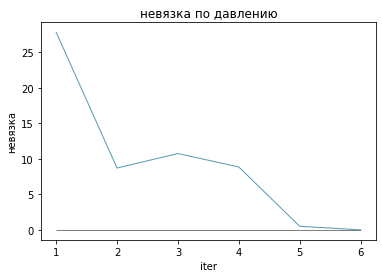

In [249]:
it = np.arange(1, deton[0])
pressure = [abs(deton[2][i+1][0]-deton[2][i][0])/p_0 for i in range(0, deton[0]-1)]

lineplot_1(it, pressure, 'iter', 'невязка', 'невязка по давлению', 'p_nev.png')

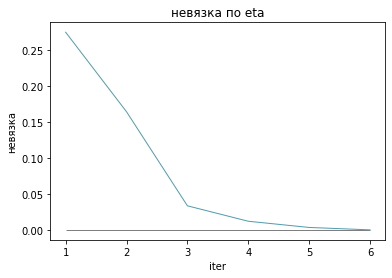

In [250]:
it = np.arange(1, deton[0])
pressure = [abs(deton[2][i+1][1]-deton[2][i][1])/eta_0 for i in range(0, deton[0]-1)]

lineplot_1(it, pressure, 'iter', 'невязка', 'невязка по eta', 'eta_nev.png')

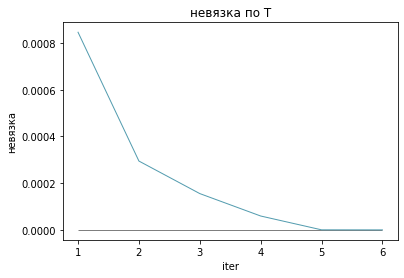

In [251]:
it = np.arange(1, deton[0])
pressure = [abs(deton[2][i+1][3]-deton[2][i][3])/T_0 for i in range(0, deton[0]-1)]

lineplot_1(it, pressure, 'iter', 'невязка', 'невязка по T', 'T_nev.png')

In [252]:
defl = newton(p_0, 10*eta_0, 10*T_0, gamma_0, C_0[0], C_0[1], C_0[2], C_0[3], C_0[4])
# Должно быть близко к нулю
# print("Должно быть близко к нулю")
# print(Fcalc2(defl))

print(defl)
# print("скорость фронта: ", front_speed(defl))

(5, array([4.57212350e+04, 1.36617355e+01, 3.12553925e+03, 1.24128137e+00,
       7.83041221e+04, 3.18670118e+04, 2.87577403e+04, 5.39553427e+04,
       4.88648320e+04]), [[100000.0, 5.955467779457951, 2980.0, 1.3703078071431394, 35380.219482536915, 21052.19609820771, 20790.80649954279, 28792.38441763058, 25255.70484841663], [76676.32374892526, 8.503768595020812, 3560.074507400093, 1.1651027366806417, 79922.45238522446, 32728.25951362394, 29057.690421106672, 54488.75266487118, 50375.34625620113], [56090.69592456043, 11.74430550701492, 3630.034201379196, 1.2385385931442758, 79866.89686361993, 32762.62689421435, 29026.872753019667, 54480.98362357672, 50194.34705782611], [46976.34191786122, 13.133680791284275, 3150.5735095394775, 1.2408246121234314, 78493.83190892628, 31970.559452713936, 28803.910489276528, 54001.818596304096, 49108.66856207353], [45768.454049049586, 13.639049100335734, 3126.620707832548, 1.2412727282977993, 78308.26776695944, 31869.206620496403, 28758.518050543946, 53956

In [253]:
print(front_speed(defl[1]))
print(gas_speed(defl[1]))

38.38454475322769
-842.1499806230154


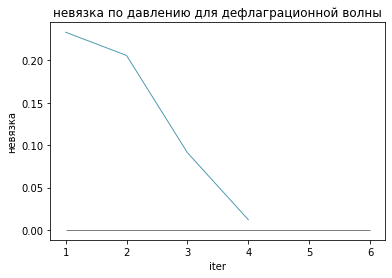

In [254]:
it = np.arange(1, defl[0])
pressure = [abs(defl[2][i+1][0]-defl[2][i][0])/p_0 for i in range(0, defl[0]-1)]

lineplot_1(it, pressure, 'iter', 'невязка', 'невязка по давлению для дефлаграционной волны', 'p_defl_nev.png')

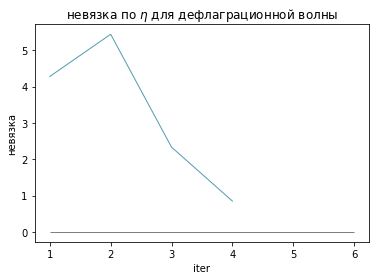

In [255]:
it = np.arange(1, defl[0])
pressure = [abs(defl[2][i+1][1]-defl[2][i][1])/eta_0 for i in range(0, defl[0]-1)]

lineplot_1(it, pressure, 'iter', 'невязка', 'невязка по $\eta$ для дефлаграционной волны', 'eta_defl_nev.png')

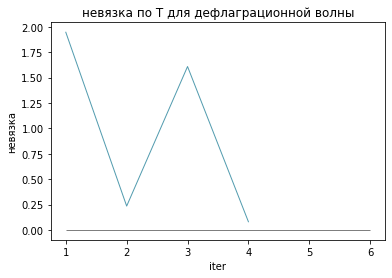

In [256]:
it = np.arange(1, defl[0])
pressure = [abs(defl[2][i+1][2]-defl[2][i][2])/T_0 for i in range(0, defl[0]-1)]

lineplot_1(it, pressure, 'iter', 'невязка', 'невязка по T для дефлаграционной волны', 'T_defl_nev.png')

In [257]:
# print(defl - deton)
# print("Разница в % ", np.round(100*(defl / deton - 1)))

In [258]:
import pylab
def lineplot(x_data, y_data, y_2_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()
    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data/101325, lw = 1, color = '#539caf', alpha = 1)
    ax.plot(x_data, y_2_data/101325, lw = 1, color = '#af53a0', alpha = 1)
    plt.scatter(eta_0, p_0/101325, color = 'red', s = 8)
    plt.scatter(deton[1][1]-.05, deton[1][0]/101325, color = 'green', s = 8)
    plt.scatter(defl[1][1], defl[1][0]/101325 + 0.5, color = 'blue', s = 8)
    pylab.legend ( ("ударная адиабата", "адиабата Гюгонио", "нормальные условия", "детонационное решение", "дефлаграционное решение") )
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    plt.savefig("lab_1.png")

In [259]:
deton[1][3]

1.2344795521412815

In [185]:
def ad_p(n):
    p0=p_0
    rho0=1/eta_0
    rho=1/n
    g=deton[1][3]
    return p0*((rho/rho0)**g)

def ad_g(n):
    p0=p_0
    n0=eta_0
    g=deton[1][3]
    g0=gamma_0
    Q = 33.9
    c = (1/(g0-1)+0.5*(n-n0))+Q
    z = n/(g-1)-0.5*(n-n0)
    return p0*((c)/z)

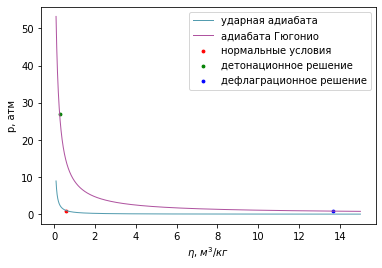

In [186]:
eta = np.arange(0.1, 15, 0.001)   #eta 
# p1 = (p_0*(eta_0/eta)**deton[3]) #p
# p2 = (((2*deton[3] - 1)/(2*eta - (deton[3] - 1)*(eta_0 - eta)))*(((deton[3] - 1)*p_0*(eta_0 - eta))/(2*deton[3]-1) + p_0*eta_0/(deton[3] -1) + Q))

lineplot(eta, ad_p(eta), ad_g(eta), '$\eta$, $м^3/кг$', 'p, атм', '')

In [187]:
C_0

[35380.219482536915,
 21052.19609820771,
 20790.80649954279,
 28792.38441763058,
 25255.70484841663]

In [189]:
diff(f_4, C_3)

0.0182331045713621*gamma - 0.0182331045713621